In [23]:
from google.colab import files
data_to_load = files.upload()

import pandas as pd

df = pd.read_csv("stats.csv")
print(df.head())

Saving stats.csv to stats (3).csv
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [25]:
from sklearn.model_selection import train_test_split

y = df['class']
X = df[["variance","skewness","curtosis","entropy"]]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5, random_state = 42)

In [26]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix


LR = LogisticRegression()
LR.fit(X_train,y_train) 

y_prediction = LR.predict(X_test) 

predicted_values = []
for i in y_prediction:
  if i == 0:
    predicted_values.append("Authorized")
  else:
    predicted_values.append("Forged")

actual_values = []
for i in y_test:
  if i == 0:
    actual_values.append("Authorized")
  else:
    actual_values.append("Forged")    

[Text(0, 0.5, 'Forged'), Text(0, 1.5, 'Authorized')]

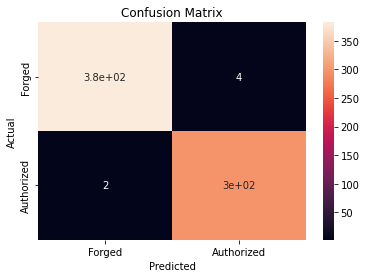

In [28]:
labels = ["Forged", "Authorized"]

cm = confusion_matrix(actual_values, predicted_values)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)

In [29]:
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)


True Negatives:  382
False Positives:  4
False Negatives:  2
True Positives:  298


In [30]:
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy: ",(Accuracy))

Accuracy:  99.12536443148689
